<a href="https://colab.research.google.com/github/Waseekk/DS_assignmen/blob/main/Renata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This report analyzes a dataset containing information about customers in a business context. The dataset comprises various attributes such as customer names, divisions, genders, marital status, age, income, and matched status. The dataset aims to provide insights into customer demographics and their income patterns.

The objective of this analysis is to explore the dataset, gain a deeper understanding of the customer characteristics, and identify any meaningful trends or relationships that can inform business decisions. By examining the data, we aim to extract valuable insights that can guide marketing strategies, customer segmentation, and overall business growth.

In this report, we will perform exploratory data analysis, descriptive statistics, and data visualization techniques to uncover patterns and relationships within the dataset. Additionally, we will conduct an encoding process to ensure consistent representation of categorical variables and explore the possibility of using K-means clustering to identify distinct customer segments based on their divisions.

By examining this dataset and analyzing its key attributes, we can gain valuable insights into customer demographics, income distribution, and potential business opportunities. Let's delve into the dataset and uncover meaningful patterns that can drive informed decision-making




# Variable Description
<b>ID:</b>Unique Identification of the
<b>Customer Name:</b> Name of the Customer
<b>Division:</b> Categorical Variable with District Name
<b>Gender:</b> Categorical Variable. We can use:


> 0=Male<br>
 1=Female





<b>MaritalStatus:</b> Marital Status of a Customer



> Marital Status: 'Single': 0<br>'Divorced':2<br>'Married': 1




<b>Age:</b> Age of Customer. Numeric Variable
<b>Income:</b> Income of the Customers
<b>Matched:</b> Matched IDs







# importing necessary Libraries

In [ ]:
# importing necessary Libraries for data analysis and k means clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# for encoing and k means analysis
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.cluster import KMeans

In [ ]:
#loading the csv file
df=pd.read_csv('//content/assignment_csv.csv')

# Exploring The Dataset


In [ ]:
#Exploring the dataset
df.describe(), df.info(), display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             50 non-null     object
 1   Customer Name  50 non-null     object
 2   Division       50 non-null     object
 3   Gender         50 non-null     object
 4   MaritalStatus  50 non-null     object
 5   Age            50 non-null     int64 
 6   Income         50 non-null     int64 
 7   Matched        50 non-null     bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 2.9+ KB


,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income,Matched
0,BU79786,Christine,Dhaka,F,Married,41,56274,True
1,QZ44356,Susan,Rajshahi,F,Single,26,0,False
2,AI49188,Margaret,Khulna,F,Married,36,48767,True
3,WW63253,David,Barishal,M,Married,28,0,False
4,HB64268,Peter,Mymensingh,M,Single,31,43836,False


(             Age        Income
 count  50.000000     50.000000
 mean   37.640000  36616.420000
 std     7.569434  31142.283185
 min    25.000000      0.000000
 25%    30.000000   2526.250000
 50%    38.500000  33057.500000
 75%    43.000000  59453.000000
 max    50.000000  99845.000000,
 None,
 None)

There is no null value in the data set. Division, Maritial Status and Gender is set as object.
# Droping the ID column

In [ ]:
# drop the ID column and save the DataFrame in a new DataFrame
data = df.drop('ID', axis=1)
display(data.head())
data.info()

,Customer Name,Division,Gender,MaritalStatus,Age,Income,Matched
0,Christine,Dhaka,F,Married,41,56274,True
1,Susan,Rajshahi,F,Single,26,0,False
2,Margaret,Khulna,F,Married,36,48767,True
3,David,Barishal,M,Married,28,0,False
4,Peter,Mymensingh,M,Single,31,43836,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  50 non-null     object
 1   Division       50 non-null     object
 2   Gender         50 non-null     object
 3   MaritalStatus  50 non-null     object
 4   Age            50 non-null     int64 
 5   Income         50 non-null     int64 
 6   Matched        50 non-null     bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 2.5+ KB


We can see ID Variable is gone. The are four variables that are object. These variables need to be changed for analysis.

# Changing dtypes

In [ ]:
# Changing gender object to int
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1}) # selecting male=0 and female=1
data['Gender']=data['Gender'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  50 non-null     object
 1   Division       50 non-null     object
 2   Gender         50 non-null     int64 
 3   MaritalStatus  50 non-null     object
 4   Age            50 non-null     int64 
 5   Income         50 non-null     int64 
 6   Matched        50 non-null     bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 2.5+ KB


In [ ]:
data.head()

,Customer Name,Division,Gender,MaritalStatus,Age,Income,Matched
0,Christine,Dhaka,1,Married,41,56274,True
1,Susan,Rajshahi,1,Single,26,0,False
2,Margaret,Khulna,1,Married,36,48767,True
3,David,Barishal,0,Married,28,0,False
4,Peter,Mymensingh,0,Single,31,43836,False




> Marital Status: 'Single': 0<br>'Divorced':2<br>'Married': 1



In [ ]:
# changing MartialStatus to category
data.MaritalStatus.unique()
data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Divorced':2,'Married': 1}) # selecting male=0 and female=1
data['MaritalStatus']=data['MaritalStatus'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Customer Name  50 non-null     object  
 1   Division       50 non-null     object  
 2   Gender         50 non-null     int64   
 3   MaritalStatus  50 non-null     category
 4   Age            50 non-null     int64   
 5   Income         50 non-null     int64   
 6   Matched        50 non-null     bool    
dtypes: bool(1), category(1), int64(3), object(2)
memory usage: 2.3+ KB


In [ ]:
#data.MaritalStatus
data[Income]

,Customer Name,Division,Gender,MaritalStatus,Age,Income,Matched
0,Christine,Dhaka,1,1,41,56274,True
1,Susan,Rajshahi,1,0,26,0,False
2,Margaret,Khulna,1,1,36,48767,True
3,David,Barishal,0,1,28,0,False
4,Peter,Mymensingh,0,0,31,43836,False
5,Judith,Sylhet,1,1,35,62902,True
6,Jennifer,Khulna,1,1,43,55350,True
7,Michael,Barishal,0,0,42,0,False
8,John,Mymensingh,0,2,29,14072,False
9,Mary,Sylhet,1,1,50,28812,False


#Encoding


There are mainly three types of encoding. We will use OneHotEncoder  for 'division' column.

In [ ]:
# Create a one-hot encoder object for 'Division' variable
one_hot_encoder = OneHotEncoder()

#Apply one-hot encoding
one_hot_encoded = one_hot_encoder.fit_transform(data[['Division']])
#print(one_hot_encoded)
#Retrieve the unique categories
division_categories = data['Division'].unique()
#print(division_categories)

#Create column names for the one-hot encoded columns
column_names = [f"Division_{cat}" for cat in division_categories]

print(column_names)



# Create a data frame
data_encoded_div = pd.concat([data, pd.DataFrame(one_hot_encoded.toarray(), columns=column_names)], axis=1)
data_encoded_div.head(10)

['Division_Dhaka', 'Division_Rajshahi', 'Division_Khulna', 'Division_Barishal', 'Division_Mymensingh', 'Division_Sylhet', 'Division_Rangpur', 'Division_Chattogram']


,Customer Name,Division,Gender,MaritalStatus,Age,Income,Matched,Division_Dhaka,Division_Rajshahi,Division_Khulna,Division_Barishal,Division_Mymensingh,Division_Sylhet,Division_Rangpur,Division_Chattogram
0,Christine,Dhaka,1,1,41,56274,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Susan,Rajshahi,1,0,26,0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Margaret,Khulna,1,1,36,48767,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,David,Barishal,0,1,28,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peter,Mymensingh,0,0,31,43836,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Judith,Sylhet,1,1,35,62902,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Jennifer,Khulna,1,1,43,55350,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Michael,Barishal,0,0,42,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,John,Mymensingh,0,2,29,14072,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Mary,Sylhet,1,1,50,28812,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Customer Name  50 non-null     object  
 1   Division       50 non-null     object  
 2   Gender         50 non-null     int64   
 3   MaritalStatus  50 non-null     category
 4   Age            50 non-null     int64   
 5   Income         50 non-null     int64   
 6   Matched        50 non-null     bool    
dtypes: bool(1), category(1), int64(3), object(2)
memory usage: 2.3+ KB


In [ ]:
data_encoded_div.head(10)

,Customer Name,Division,Gender,MaritalStatus,Age,Income,Matched,Division_Dhaka,Division_Rajshahi,Division_Khulna,Division_Barishal,Division_Mymensingh,Division_Sylhet,Division_Rangpur,Division_Chattogram
0,Christine,Dhaka,1,1,41,56274,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Susan,Rajshahi,1,0,26,0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Margaret,Khulna,1,1,36,48767,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,David,Barishal,0,1,28,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peter,Mymensingh,0,0,31,43836,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Judith,Sylhet,1,1,35,62902,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Jennifer,Khulna,1,1,43,55350,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Michael,Barishal,0,0,42,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,John,Mymensingh,0,2,29,14072,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,Mary,Sylhet,1,1,50,28812,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


.

In [ ]:
data_encoded_div.columns

Index(['Customer Name', 'Division', 'Gender', 'MaritalStatus', 'Age', 'Income',
       'Matched', 'Division_Dhaka', 'Division_Rajshahi', 'Division_Khulna',
       'Division_Barishal', 'Division_Mymensingh', 'Division_Sylhet',
       'Division_Rangpur', 'Division_Chattogram'],
      dtype='object')

In [ ]:
data_encoded_div=data_encoded_div.drop(columns=['Customer Name','Matched'])
data_encoded_div.columns

Index(['Division', 'Gender', 'MaritalStatus', 'Age', 'Income',
       'Division_Dhaka', 'Division_Rajshahi', 'Division_Khulna',
       'Division_Barishal', 'Division_Mymensingh', 'Division_Sylhet',
       'Division_Rangpur', 'Division_Chattogram'],
      dtype='object')

In [ ]:
columns_to_cluster = ['Division_Dhaka', 'Division_Rajshahi', 'Division_Khulna', 'Division_Barishal', 'Division_Mymensingh', 'Division_Sylhet', 'Division_Rangpur', 'Division_Chattogram']
X = data_encoded_div[columns_to_cluster]
#X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

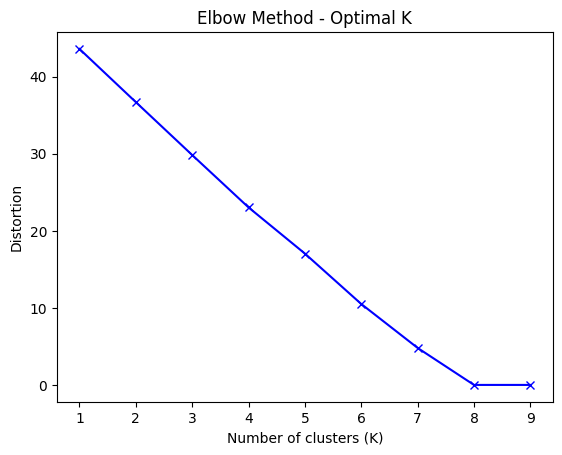

In [ ]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=36)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method - Optimal K')
plt.show()

In [ ]:
cluster_labels = kmeans.labels_
data_encoded_div['Cluster'] = cluster_labels
cluster_sizes = data_encoded_div['Cluster'].value_counts()
#print(cluster_sizes)
cluster_means = data_encoded_div.groupby('Cluster').mean()
display(data_encoded_div.head(10))

<ipython-input-195-d362fd6c0da5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data_encoded_div.groupby('Cluster').mean()


,Division,Gender,MaritalStatus,Age,Income,Division_Dhaka,Division_Rajshahi,Division_Khulna,Division_Barishal,Division_Mymensingh,Division_Sylhet,Division_Rangpur,Division_Chattogram,Cluster
0,Dhaka,1,1,41,56274,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
1,Rajshahi,1,0,26,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
2,Khulna,1,1,36,48767,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
3,Barishal,0,1,28,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,Mymensingh,0,0,31,43836,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
5,Sylhet,1,1,35,62902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,Khulna,1,1,43,55350,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
7,Barishal,0,0,42,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,Mymensingh,0,2,29,14072,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
9,Sylhet,1,1,50,28812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
# Group the data by Division and find which division belongs to which cluster
division_cluster = data_encoded_div.groupby('Division')['Cluster'].agg(lambda x: x.value_counts().index[0])

# Print the division-cluster
print(division_cluster)

Division
Barishal      7
Chattogram    2
Dhaka         5
Khulna        3
Mymensingh    6
Rajshahi      4
Rangpur       1
Sylhet        0
Name: Cluster, dtype: int64


In [ ]:
division_mean = data_encoded_div.groupby('Division').agg({'Income': 'mean', 'Age': 'mean'})
print(division_mean)

                  Income        Age
Division                           
Barishal    15464.750000  37.500000
Chattogram  37161.142857  37.714286
Dhaka       52844.833333  37.500000
Khulna      54590.428571  39.714286
Mymensingh  43141.666667  36.500000
Rajshahi    27898.166667  38.500000
Rangpur     30059.142857  35.714286
Sylhet      24711.285714  37.857143


In [ ]:
data_encoded_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Division             50 non-null     object  
 1   Gender               50 non-null     int64   
 2   MaritalStatus        50 non-null     category
 3   Age                  50 non-null     int64   
 4   Income               50 non-null     int64   
 5   Division_Dhaka       50 non-null     float64 
 6   Division_Rajshahi    50 non-null     float64 
 7   Division_Khulna      50 non-null     float64 
 8   Division_Barishal    50 non-null     float64 
 9   Division_Mymensingh  50 non-null     float64 
 10  Division_Sylhet      50 non-null     float64 
 11  Division_Rangpur     50 non-null     float64 
 12  Division_Chattogram  50 non-null     float64 
 13  Cluster              50 non-null     int32   
dtypes: category(1), float64(8), int32(1), int64(3), object(1)
memory usage: 5.2+

# Analysis of the clusters

<ipython-input-199-c06c3e83e31f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded_div.corr()


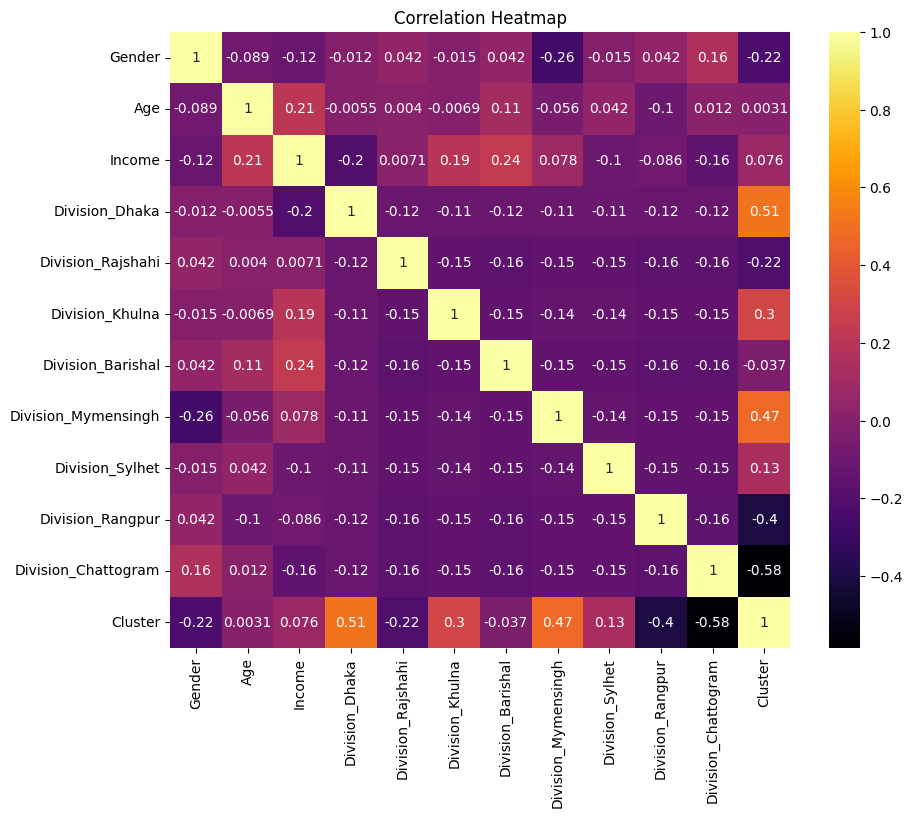

In [ ]:

#correlation matrix
correlation_matrix = data_encoded_div.corr()
plt.figure(figsize=(10, 8))

# heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Calculate the average income and age by division
division_avg = data_encoded_div.groupby('Division')['Income', 'Age'].mean()

# Join the division averages with the original DataFrame
data_encoded_div = data_encoded_div.join(division_avg, on='Division', rsuffix='_avg')

# Print the updated DataFrame
print(data_encoded_div)


      Division  Gender MaritalStatus  Age  Income  Division_Dhaka  \
0        Dhaka       1             1   41   56274             0.0   
1     Rajshahi       1             0   26       0             0.0   
2       Khulna       1             1   36   48767             0.0   
3     Barishal       0             1   28       0             1.0   
4   Mymensingh       0             0   31   43836             0.0   
5       Sylhet       1             1   35   62902             0.0   
6       Khulna       1             1   43   55350             0.0   
7     Barishal       0             0   42       0             1.0   
8   Mymensingh       0             2   29   14072             0.0   
9       Sylhet       1             1   50   28812             0.0   
10     Rangpur       0             0   44       0             0.0   
11  Chattogram       1             1   39       0             0.0   
12       Dhaka       0             1   25   77026             0.0   
13    Rajshahi       0            

<ipython-input-200-a586832429b6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  division_avg = data_encoded_div.groupby('Division')['Income', 'Age'].mean()


In [201]:
data_encoded_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Division             50 non-null     object  
 1   Gender               50 non-null     int64   
 2   MaritalStatus        50 non-null     category
 3   Age                  50 non-null     int64   
 4   Income               50 non-null     int64   
 5   Division_Dhaka       50 non-null     float64 
 6   Division_Rajshahi    50 non-null     float64 
 7   Division_Khulna      50 non-null     float64 
 8   Division_Barishal    50 non-null     float64 
 9   Division_Mymensingh  50 non-null     float64 
 10  Division_Sylhet      50 non-null     float64 
 11  Division_Rangpur     50 non-null     float64 
 12  Division_Chattogram  50 non-null     float64 
 13  Cluster              50 non-null     int32   
 14  Income_avg           50 non-null     float64 
 15  Age_avg              50 n

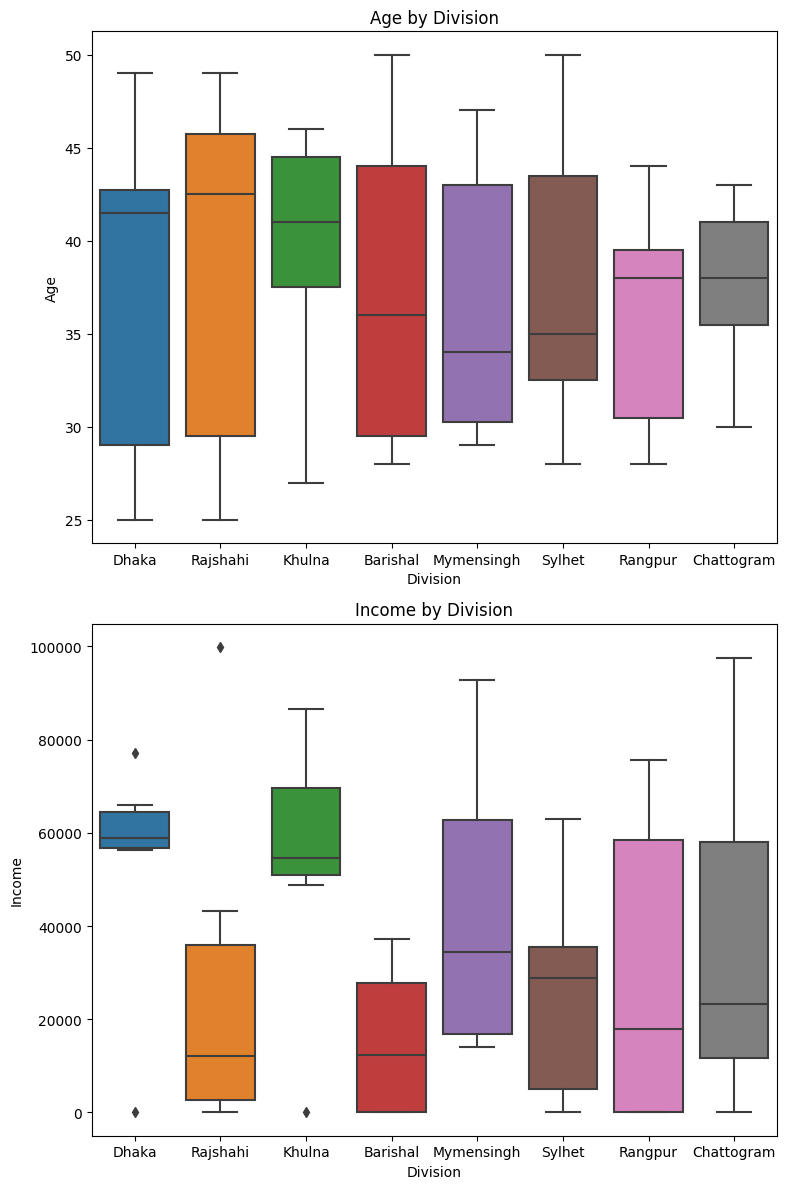

In [202]:
# Create a dictionary to map cluster numbers to division names so that you can use the division name instead of cluster number
cluster_mapping = {
    7: 'Barishal',
    2: 'Chattogram',
    5: 'Dhaka',
    3: 'Khulna',
    6: 'Mymensingh',
    4: 'Rajshahi',
    1: 'Rangpur',
    0: 'Sylhet'
}

# mapping
data_encoded_div['Division'] = data_encoded_div['Cluster'].map(cluster_mapping)

variables = ['Age', 'Income']

# subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(8, 6 * len(variables)))

# Plotting the variables
for i, variable in enumerate(variables):
    # Plot using seaborn
    sns.boxplot(x='Division', y=variable, data=data_encoded_div, ax=axes[i])
    axes[i].set_title(f'{variable} by Division')



plt.tight_layout()
plt.show()


We can see the spreadness of age and income in boxplot for the divisions. Most people is aged between 35-40 years. Rangpur, Chattogram and Mymensingh has most widely spread data for total income. Dhaka has Highest income median and Barishal has lowest income for median.

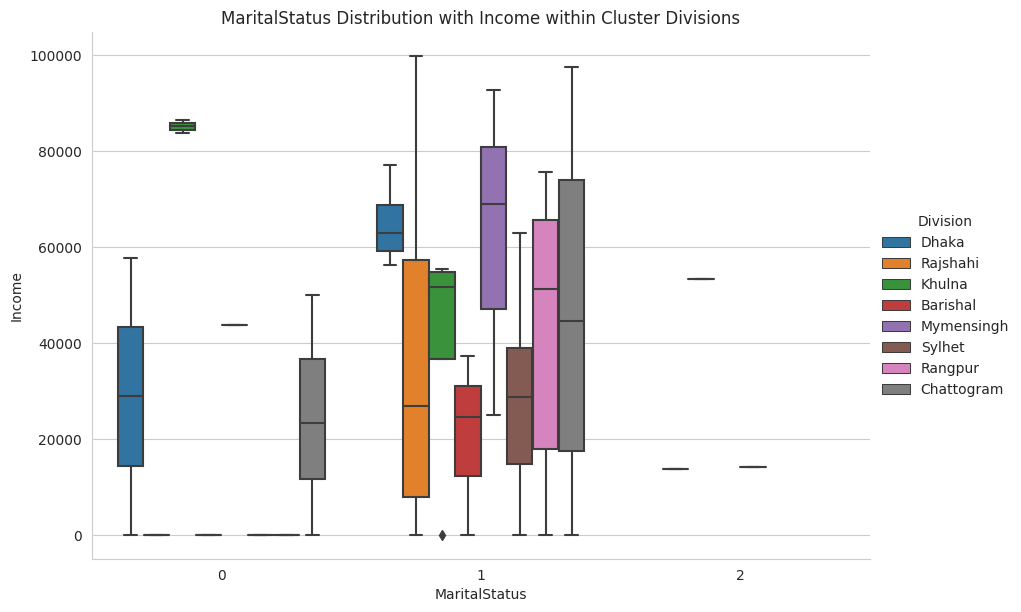

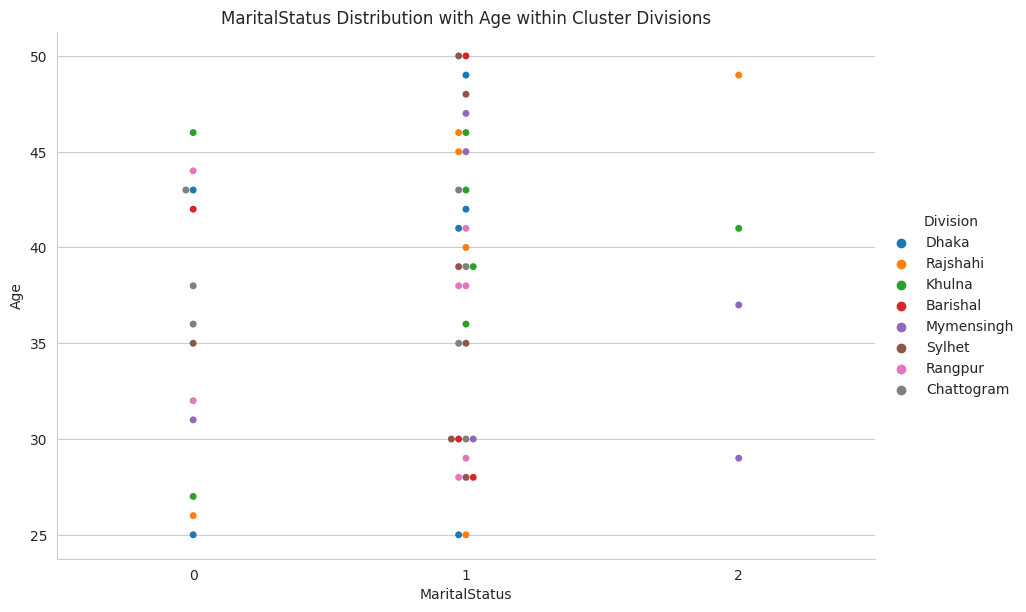

In [208]:
# using seaborn for grouped & categorical MaritalStatus Data
sns.set_style("whitegrid")

# Create a categorical plot using seaborn
sns.catplot(x="MaritalStatus", y="Income", hue="Division", data=data_encoded_div, kind="box", height=6, aspect=1.5)
plt.title("MaritalStatus Distribution with Income within Cluster Divisions")

# Create a categorical  plot for age using seaborn
sns.catplot(x="MaritalStatus", y="Age", hue="Division", data=data_encoded_div, kind="swarm", height=6, aspect=1.5)
plt.title("MaritalStatus Distribution with Age within Cluster Divisions")

# Show the plots
plt.show()




> Marital Status: 'Single': 0<br>'Divorced':2<br>'Married': 1<br>
The graph shows the relation of MaritalStats of age and income by division.



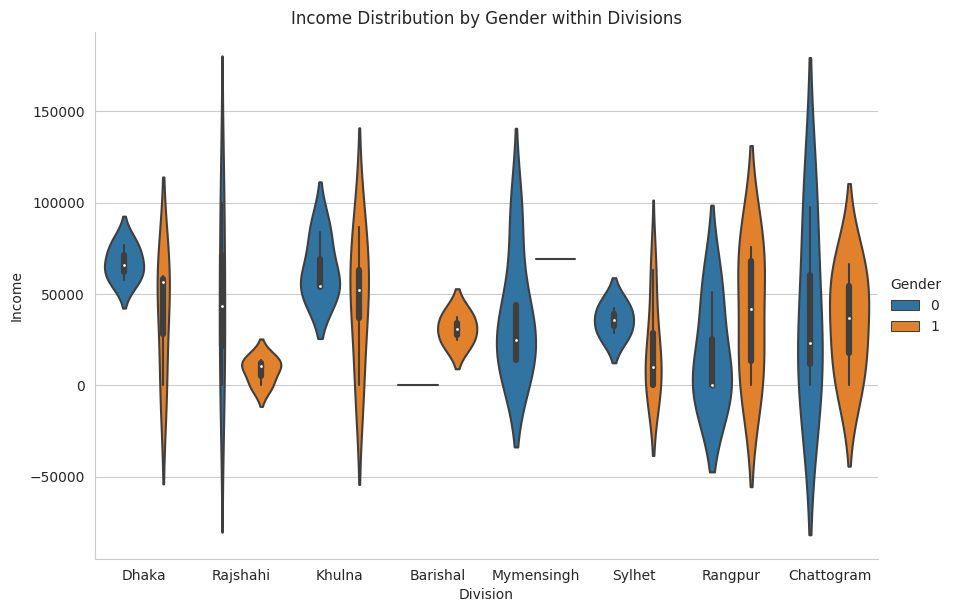

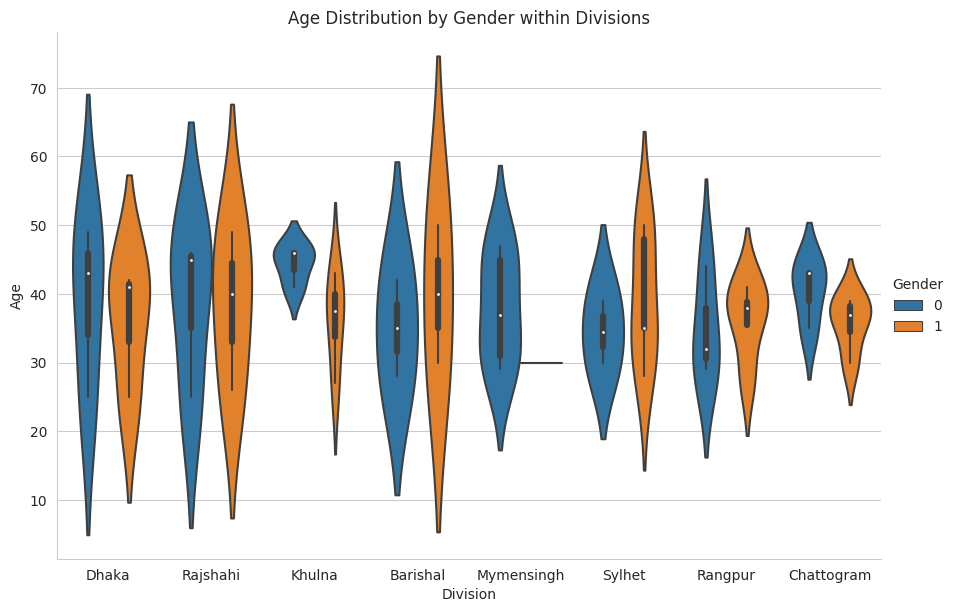

In [210]:
# Create a violin plot for 'Income' by 'Gender' within each 'Division'
sns.catplot(x="Division", y="Income", hue="Gender", data=data_encoded_div, kind="violin", height=6, aspect=1.5)
plt.title("Income Distribution by Gender within Divisions")

# Create a violin plot for 'Age' by 'Gender' within each 'Division'
sns.catplot(x="Division", y="Age", hue="Gender", data=data_encoded_div, kind="violin", height=6, aspect=1.5)
plt.title("Age Distribution by Gender within Divisions")

# Show the plots
plt.show()


Violin plot provides a combination of a box plot and a kernel density plot, allowing us to visualize the distribution of a variable across different categories. In this case, we can use it to see the distribution of 'Income' and 'Age' for each 'Gender' within each 'Division'.

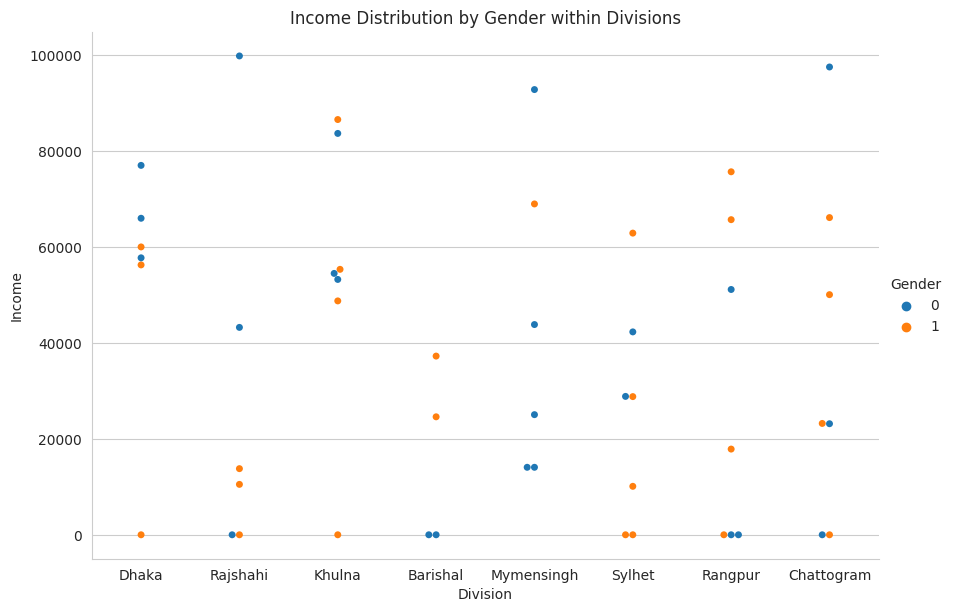

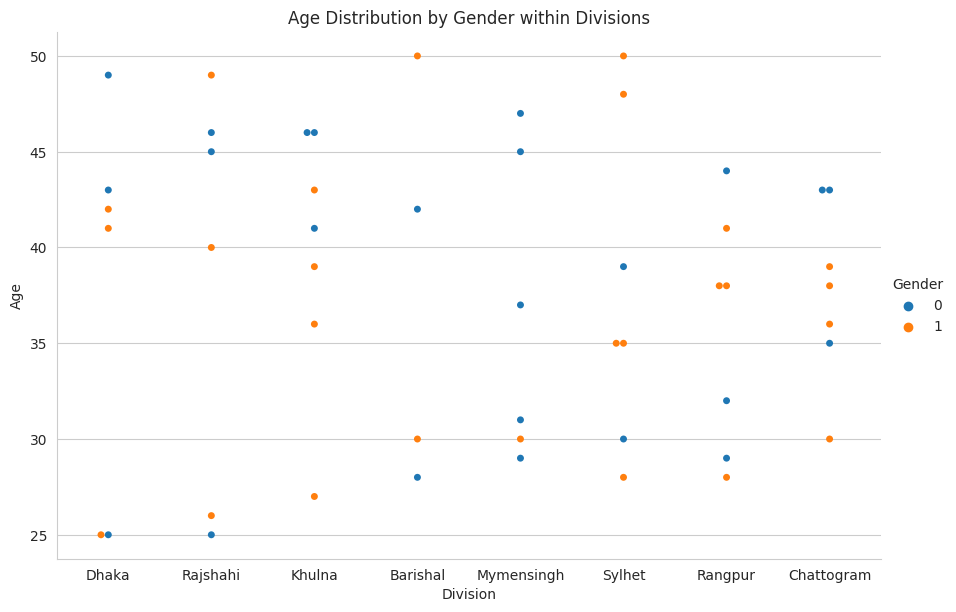

In [211]:
# Create a swarm plot for 'Income' by 'Gender' within each 'Division'
sns.catplot(x="Division", y="Income", hue="Gender", data=data_encoded_div, kind="swarm", height=6, aspect=1.5)
plt.title("Income Distribution by Gender within Divisions")

# Create a swarm plot for 'Age' by 'Gender' within each 'Division'
sns.catplot(x="Division", y="Age", hue="Gender", data=data_encoded_div, kind="swarm", height=6, aspect=1.5)
plt.title("Age Distribution by Gender within Divisions")

# Show the plots
plt.show()


 Swarp plot help us to observe the distribution of 'Income' and 'Age' for each 'Gender' within each 'Division'